In [1]:
# 导入库
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# 数据预处理

# 数据加载
def data_get():
    bostonHousing=datasets.load_boston()
    # 获取特征数据
    bostonData=bostonHousing.data
    # 获取标签集
    bostonTar=bostonHousing.target
    return bostonData,bostonTar

In [3]:
# 数据可视化
def data_show(bostonData,bostonTar):
    fig=plt.figure(figsize=(20,5)) # 建立一个大小为20*5的画板
    ax1=fig.add_subplot(1,3,1)
    ax2=fig.add_subplot(1,3,2)
    ax3=fig.add_subplot(1,3,3)
    ax1.scatter(bostonData[:150,0],bostonTar[:150],color='red',marker='o')
    ax1.set_xlabel('crim')
    ax1.set_ylabel('house price')
    
    ax2.scatter(bostonData[:300,6],bostonTar[:300],color='red',marker='o')
    ax2.set_xlabel('age')
    ax2.set_ylabel('house price')
    
    ax3.scatter(bostonData[:200,12],bostonTar[:200],color='red',marker='o')
    ax3.set_xlabel('lstat')
    ax3.set_ylabel('house price')
    
    plt.show()

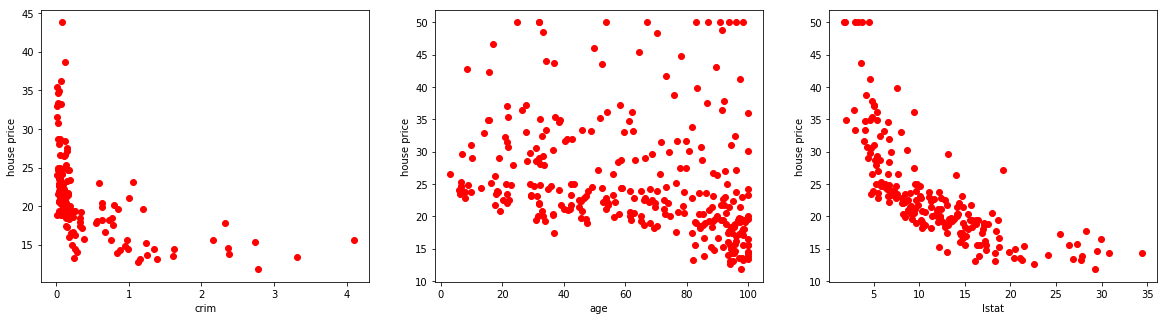

In [9]:
bostonData,bostonTar=data_get()
data_show(bostonData,bostonTar)

In [10]:
# 获取人口中地位低下者的比例数据 
def data_deal(bostonData):
    lstat=bostonData[:,12]
    return lstat


In [11]:
# 数据集拆分
def data_split(data,tar):
    x_train,x_test,y_train,y_test=train_test_split(data,tar,test_size=5,random_state=30)
    return x_train,x_test,y_train,y_test

In [16]:
# 线性回归
def linear_reg(x_train,x_test,y_train,y_test):
    lir=LinearRegression()
    x_train=x_train.reshape(-1,1)
    lir.fit(x_train,y_train)
    x_test=x_test.reshape(-1,1)
    pred=lir.predict(x_test)
    # 获取回归系数和阈值
    coef=lir.coef_
    intercept=lir.intercept_
    return pred,coef,intercept

In [17]:
x=data_deal(bostonData)
x_train,x_test,y_train,y_test=data_split(x,bostonTar)

pred,coef,intercept=linear_reg(x_train,x_test,y_train,y_test)
print(pred)
print(coef)
print(intercept)

[21.43113816 13.58207561 21.80084038 27.98150315 16.79564107]
[-0.94795441]
34.54134769077225


In [20]:
# 可视化回归直线
def line_show(data,tar,coef,intercept):
    plt.scatter(data,tar,color='r',marker='o')
    x=np.arange(0,40,0.1)
    y=x*coef+intercept
    for i in range(len(tar)):
        res=(tar[i]-data[i])**2
        res+=res
    plt.plot(x,y,color='k',linewidth=2)
    plt.xlabel('lstat')
    plt.ylabel('house price')
    plt.show()

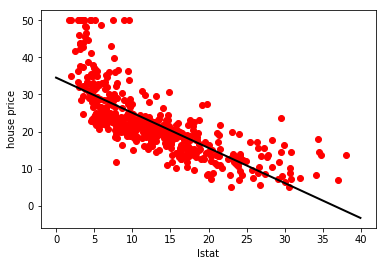

In [21]:
line_show(x_train,y_train,coef,intercept)